In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('student_scores - student_scores.csv')

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.info() # to get the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.shape # to get the shape of the dataset


(25, 2)

In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Hours', ylabel='Scores'>

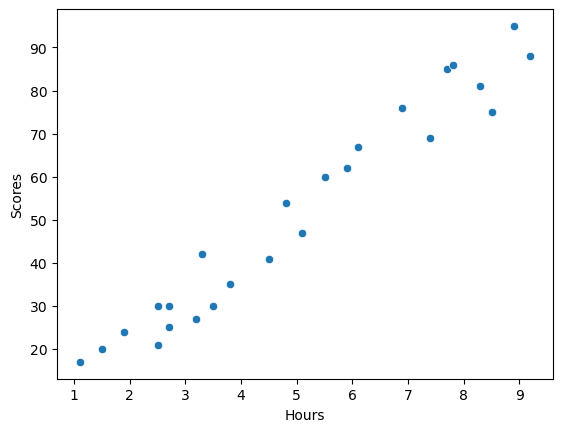

In [10]:
sns.scatterplot(x=data['Hours'], y=data['Scores'])

<Axes: xlabel='Hours', ylabel='Scores'>

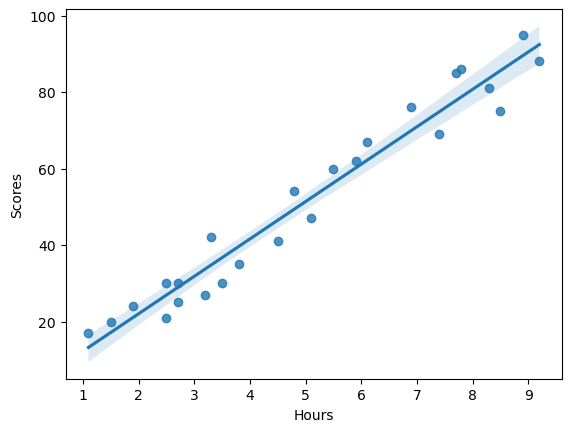

In [11]:
sns.regplot(x=data['Hours'], y=data['Scores'])

Seoarate features and target

In [12]:
X = data[['Hours']]
y = data['Scores']

Train and Split Data

In [13]:
from sklearn.model_selection  import train_test_split

In [14]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state =0)

Model Building 

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
regressor = LinearRegression()

In [17]:
regressor.fit(train_X, train_y)

LinearRegression()

In [18]:
predicted_y = regressor.predict(val_X)

In [19]:
pd.DataFrame({'Actual':val_y, 'Predicted': predicted_y})

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


<Axes: xlabel='Scores', ylabel='Density'>

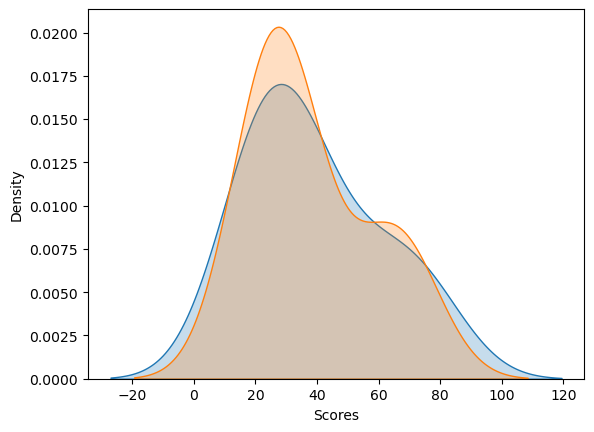

In [20]:
sns.kdeplot(predicted_y, label ="Predicted", shade=True)
sns.kdeplot(data=val_y, label ="Actual", shade=True)

In [21]:
print('Train accuracy: ', regressor.score(train_X, train_y),'\nTest accuracy : ', regressor.score(val_X, val_y) )

Train accuracy:  0.9484509249326872 
Test accuracy :  0.9367661043365055


Q. What will be predicted score if a student studies for 9.25 hrs/ day? 

In [22]:
h = [[9.25]]
score = regressor.predict(h)
print('The predicted score if a student studies for ', h[0][0], ' hrs/day is : ',score[0])

The predicted score if a student studies for  9.25  hrs/day is :  93.89272889341655
